<a href="https://colab.research.google.com/github/AnBa37/Tubes-SKO/blob/main/Tubes_SKO_Anggit_Bagaskara_TT_42_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

Nama: Anggit Bagaskara 

NIM: 1101174145

Kelas: TT-42-02

Skenario Perancangan Tubes SKO :

Dari sentral (STO) menuju ODC lalu dari  ODC kemudian ke ODP. Sebuah gedung yang berisikan 3 lantai. Dengan skenario tersebut, akan menggunakan 2 konektor dan 2 spliter dengan spliter 1:64 dengan redaman 20 dB untuk ONU ke ODP dan menggunakan spliter 1:32 dengan redaman 17 dB untuk ODP ke Roset. Akan menggunakan fiber jenis G652D dengan panjang gelombang 1550 nm dengan redaman 0.28 dB/Km. Selain itu, dengan jumlah 2 konektor dan splitter 2, maka splicer berjumlah 4 buah yang memiliki redaman sebesar 0.1 db.


*Spesifikasi*:

1. Jenis Fiber yang akan digunakan = G652D dengan panjang gelombang 1550 nm 
2. Hambatan Fiber = 0.28 dB/Km
3. Jumlah Konektor = 2 buah
4. Hambatan Konektor = 0.3 dB
5. Jumlah Splitter = 2 (1:64 dan 1:32)
6. Hambatan Splitter = 20 dB dan 17 dB
7. Jumlah Splicer = 2 buah
8. Hambatan Splicer = 0.1 dB
9. Margin = -0.23
10. Safety Margin = 3 dB 
11. Suhu = 290 K
12. Faktor Gain = 0<F(M)< 1
13. Hambatan Ekuivalensi = 50 Ohm
14. Dark Current = 200 nA
15. Responsivitas = 0.85 A/W

In [95]:
#Parameter Perhitungan SNR
SM = 3 #dB
Resp = 0.85 #A/W
q = 1.6*10**-19
Margin = -0.23 
B = 8*10**9 #Hz
dc = 200*10**-9 #nA 
Gain = 1 
K = 1.38*10**-23
T = 290 #Kelvin
R = 50 #Ohm
NtL = lambda x : 10 * np.log10(x)
LtN = lambda x : 10**(x/10)
L_fiber = 0.28  #dB/km
jml_splicer = 2 
L_splicer = 0.1 #dB
jml_connector = 2 
L_connector = 0.3 #dB
L_splitter = 17 + 20 #dB
d = np.arange(0.197,6.197,0.5) #Jarak Dari STO ke ONU = 6 km #Jarak dari ONU ke Roset = < 500 m 
Ptx = 3 

In [96]:
#RUMUS PR
def Prx():
  total_hambatan_splicer = jml_splicer * L_splicer
  total_hambatan_fiber = d * L_fiber
  total_hambatan_connector = jml_connector * L_connector
  total =  total_hambatan_splicer + total_hambatan_fiber + total_hambatan_connector + L_splitter + SM
  Pr = Ptx - total
  return Pr,total
Pr,total = Prx()
#Signal Power
def sp():
  Pr_num = LtN(Pr)
  ip = Pr_num * Resp
  Is_kuadrat = pow((ip*Margin),2)
  return ip,Is_kuadrat
ip,Is_kuadrat = sp()
print('Nilai Hambatan Total = ', total)
print('\nDaya Rx = ', Pr)
print('\nArus Primer = ', ip)
print('\nIs kuadrat = ', Is_kuadrat)

Nilai Hambatan Total =  [40.85516 40.99516 41.13516 41.27516 41.41516 41.55516 41.69516 41.83516
 41.97516 42.11516 42.25516 42.39516]

Daya Rx =  [-37.85516 -37.99516 -38.13516 -38.27516 -38.41516 -38.55516 -38.69516
 -38.83516 -38.97516 -39.11516 -39.25516 -39.39516]

Arus Primer =  [1.39284544e-04 1.34866139e-04 1.30587896e-04 1.26445368e-04
 1.22434250e-04 1.18550373e-04 1.14789701e-04 1.11148326e-04
 1.07622463e-04 1.04208447e-04 1.00902732e-04 9.77018812e-05]

Is kuadrat =  [1.02626974e-09 9.62191516e-10 9.02114209e-10 8.45788008e-10
 7.92978703e-10 7.43466704e-10 6.97046135e-10 6.53523973e-10
 6.12719248e-10 5.74462288e-10 5.38594015e-10 5.04965286e-10]


In [97]:
#RUMUS PERHITUNGAN SNR
def SNR():
  #PERHITUNGAN NOISE
  DC = 2*q*dc*B*(Margin**2)*Gain 
  NT = (4*K*T*B)/R 
  SN = 2*q*ip*B*(Margin**2)*Gain 
  Sinyal = Is_kuadrat 
  Noise = DC + SN + NT 
  SNR = Sinyal / Noise
  SNR_dBm = NtL(SNR)
  return SNR, SNR_dBm
SNR, SNR_dBm = SNR()
#PERHITUNGAN Q Faktor
def Q_faktor():
  Q_faktor = (0.5*10**(SNR_dBm/20)) 
  return Q_faktor
Q = Q_faktor()
#PERHITUNGAN BER
penjumlahan = []
def BER_rumus():
  akar = 1/(Q * m.sqrt(2 * m.pi))
  for i in range(len(Q)):
    perhitungan = m.exp(-(Q[i]**2)/2)
    penjumlahan.append(perhitungan)
  BER = (1/akar)*(penjumlahan)
  return BER
  
BER = BER_rumus()
print('Nilai SNR numerik = ', SNR)
print('\nNilai SNR logaritmik = ', SNR_dBm)
print('\nNilai Q Faktor = ', Q)
print('\nNilai BER = ', BER)

Nilai SNR numerik =  [397.75282885 373.00444262 349.79335809 328.02431663 307.60794082
 288.46037333 270.50293777 253.66182022 237.86777019 223.05581982
 209.16502027 196.13819419]

Nilai SNR logaritmik =  [25.99613277 25.71714004 25.43811559 25.15906039 24.87997542 24.60086161
 24.32171986 24.04255105 23.76335601 23.48413559 23.20489057 22.92562173]

Nilai Q Faktor =  [9.9718708  9.65666147 9.35138169 9.0557208  8.7693777  8.49206061
 8.22348676 7.96338214 7.71148122 7.4675267  7.23126926 7.00246732]

Nilai BER =  [6.38460797e-21 1.36362686e-19 2.40325616e-18 3.53687025e-17
 4.39546472e-16 4.66132593e-15 4.25994783e-14 3.38607359e-13
 2.36126776e-12 1.45639022e-11 8.00576252e-11 3.95024559e-10]


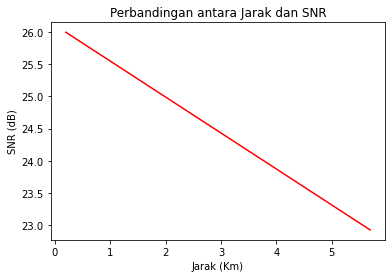

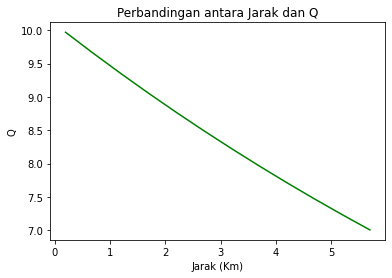

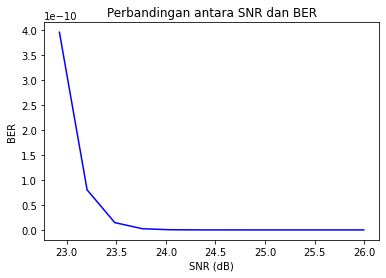

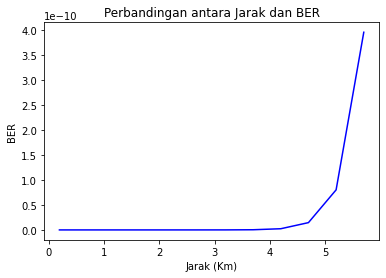

In [98]:
#GRAFIK PERBANDINGAN NILAI
def Perbandingan_Jarak_dan_SNR():
  plt.figure()
  plt.plot(d,SNR_dBm,'r')
  plt.title('Perbandingan antara Jarak dan SNR')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('SNR (dB)')
  plt.show()
def Perbandingan_Jarak_dan_Q():
  plt.figure()
  plt.plot(d,Q,'g')
  plt.title('Perbandingan antara Jarak dan Q')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('Q')
  plt.show()
def Perbandingan_SNR_dan_BER():
  plt.figure()
  plt.plot(SNR_dBm,BER,'b')
  plt.title('Perbandingan antara SNR dan BER')
  plt.xlabel('SNR (dB)')
  plt.ylabel('BER')
  plt.show()
def Perbandingan_Jarak_dan_BER():
  plt.figure()
  plt.plot(d,BER,'b')
  plt.title('Perbandingan antara Jarak dan BER')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('BER')
  plt.show()
Perbandingan_Jarak_dan_SNR()
Perbandingan_Jarak_dan_Q()
Perbandingan_SNR_dan_BER()
Perbandingan_Jarak_dan_BER()

Kesimpulan:

Dari grafik diatas, dapat diketahui bahwa semakin jauh jarak maka semakin kecil nilai SNR dan Q faktornya. Semakin besar Nilai SNR maka nilai BER akan semakin besar. Dan semakin jauh jarak maka nilai BER akan semakin kecil.